In [26]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [27]:
# Initialize Constants
T = 1000
numActions = 100
maxDelay = 10

delta = 0.5
gamma = 0.5

In [32]:
# Helper Functions

# Actions in a 1-d action space
def generateActions(num):
    a = []
    for i in range(num):
        a.append(random.uniform(-10, 10))
    return a

# Tuple of (reward, delay)
def generateRewards(num):
    r = []
    for i in range(num):
        r.append((random.uniform(-1,1), random.randrange(0, 5)))
    return r

def getMax(rewards):
    r = []
    for i in rewards:
        r.append(i[0])
    return max(r)

def getClosestAction(xhat, a, currentAction):
    temp = a.copy()
    temp.remove(currentAction)
    
    return min(temp, key=lambda x:abs(x-xhat))
    
    

In [42]:
def GOLD(a, r):
    # Initialize variables
    totalRegret = [0]
    delayArray = []      # Keeps track of what stage the reward will be received
    priorityQueue = []
    chosenActions = []   # Gradient update
    maxReward = getMax(r)
    
    Zt = []
    uhat = []
    
    initialAction = random.choice(a)
    index = a.index(initialAction)
    expectedRegret = maxReward - r[index][0]
    delayArray.append((initialAction, r[index][1], expectedRegret))
    chosenActions.append(initialAction)
    
    for t in range(T):
        Zt.append(random.uniform(-1, 1))
        xhat = chosenActions[t] + delta * (Zt[t] - (1/10)*(chosenActions[t] - random.choice(a)))
        
        xhat = getClosestAction(xhat, a, chosenActions[t])
        uhat.append(r[a.index(xhat)][0])
        
#         delayArray.append((chosenAction, t + r[index][1], expectedRegret))
        
        for d in delayArray:
            if d[1] == t:
                priorityQueue.append(d[0])
                totalRegret.append(d[2] + totalRegret[-1])
                
        if len(priorityQueue) == 0:
            chosenActions.append(chosenActions[-1])
        else:
            qt = priorityQueue.pop(0)
            index = chosenActions.index(qt)
            vhat = 0.5 * uhat[index] * Zt[index]
            
            for i in a:
                minim = 100
                nextAction = i
                
                value = abs(i - (chosenActions[t] + 0.5 * vhat))
                
                if value < minim:
                    nextAction = i
                    minim = value
            chosenActions.append(nextAction)
            
        index = a.index(chosenActions[-1])
        delayArray.append((chosenActions[-1], t + r[index][1], maxReward - r[index][0]))
        
    return totalRegret

In [43]:
actions = generateActions(numActions)
rewards = generateRewards(numActions)

In [51]:
regretArray = GOLD(actions, rewards)

In [58]:
upperBound = []
for t in range(T):
    upperBound.append(pow(t, 3/4) + pow(t, 2/3 + .5/3))

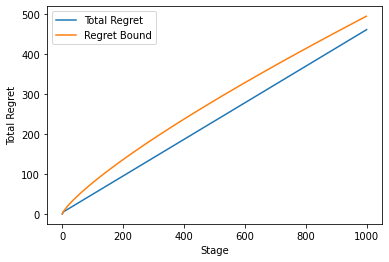

<Figure size 432x288 with 0 Axes>

In [59]:
#Plot stage vs regret
x = np.linspace(0, 10, 1000)

plt.plot(regretArray)
plt.plot(upperBound)
plt.legend(['Total Regret','Regret Bound'])
plt.xlabel("Stage")
plt.ylabel("Total Regret")
plt.show()
plt.savefig("Stage vs Regret")